In [1]:
import dwave_networkx as dnx
from embedding_utils import *
import pandas as pd
from brute_force import *
from utils import *
from dwave.embedding.chain_strength import scaled
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
qpu = DWaveSampler(solver={"name": "Advantage_system6.1"})
seed=1

In [3]:
vars_to_clauses = {
    10: [10, 15, 20, 25],
    15: [15, 20, 25, 30, 35, 40, 45],
    20: [30, 35]
}


In [4]:
num_variables = []
num_clauses = []
max_chain_lengths = []
count_qubits = []
variances = []
random_seeds = {}
for (nvars, nclauses_arr) in vars_to_clauses.items():
    temp_dict = dict()
    for nclauses in nclauses_arr:
        bqm, clauses = get_bqm_random_sat(nvars, nclauses, seed)
        embedding, random_seed = find_best_embedding(bqm, qpu)
        max_chain_length, cqubits, variance_lengths = get_embedding_statistics(embedding)
        num_variables.append(nvars)
        num_clauses.append(nclauses)
        max_chain_lengths.append(max_chain_length)
        count_qubits.append(cqubits)
        variances.append(variance_lengths)
        temp_dict[nclauses] = random_seed
    random_seeds[nvars] = temp_dict
df = pd.DataFrame({
    'vars': num_variables,
    'clauses': num_clauses,
    'max_chain_length': max_chain_lengths,
    'num_qubits': count_qubits,
    'variance': variances
})
df.to_csv("./rnd_cnfs_advantage6.csv")
df


best embedding random_seed 99
best embedding max_chain_length 2
best embedding qubits used 21
best embedding variance: 0.05
best embedding random_seed 77
best embedding max_chain_length 2
best embedding qubits used 30
best embedding variance: 0.16666666666666669
best embedding random_seed 24
best embedding max_chain_length 2
best embedding qubits used 40
best embedding variance: 0.22988505747126436
best embedding random_seed 80
best embedding max_chain_length 3
best embedding qubits used 49
best embedding variance: 0.3058823529411765
best embedding random_seed 73
best embedding max_chain_length 2
best embedding qubits used 34
best embedding variance: 0.11954022988505747
best embedding random_seed 60
best embedding max_chain_length 2
best embedding qubits used 43
best embedding variance: 0.18151260504201683
best embedding random_seed 44
best embedding max_chain_length 3
best embedding qubits used 59
best embedding variance: 0.307051282051282
best embedding random_seed 97
best embedding 

,vars,clauses,max_chain_length,num_qubits,variance
0,10,10,2,21,0.05
1,10,15,2,30,0.17
2,10,20,2,40,0.23
3,10,25,3,49,0.31
4,15,15,2,34,0.12
5,15,20,2,43,0.18
6,15,25,3,59,0.31
7,15,30,3,69,0.39
8,15,35,3,79,0.58
9,15,40,4,93,0.74


In [5]:
random_seeds

{10: {10: 99, 15: 77, 20: 24, 25: 80},
 15: {15: 73, 20: 60, 25: 44, 30: 97, 35: 74, 40: 52, 45: 32},
 20: {30: 46, 35: 70}}

# Quantum Sampler

In [6]:
def find_best_chain_strength(bqm, embedding, top_chain_strength, clauses, file_name):
    chain_strengths = []
    precisions = []
    for chain_strength in list(np.arange(1.0, top_chain_strength + 0.25, 0.25)):
        chain_strengths.append(chain_strength)
        precisions.append(sample_with_sampler(embedding, bqm, 100, chain_strength, clauses, name="Advantage_system6.1"))
    current_df = pd.DataFrame({
     'chain_strength': chain_strengths,
     'precision': precisions,
     })  
    current_df.to_csv(f"./rnd_cnf_precision/advantage6_{file_name}.csv")
    return current_df
    

## 10 variables

In [7]:
for n_clauses in [10, 15, 20, 25]:
    bqm, clauses = get_bqm_random_sat(10, n_clauses, seed)
    embedding = get_embedding(bqm, qpu, random_seeds[10][n_clauses])
    print(scaled(bqm, embedding), max(bqm.quadratic.values()) )

6.0 4.0
8.0 4.0
8.0 4.0
16.0 4.0


In [8]:
bqm, clauses = get_bqm_random_sat(10, 10, seed)
embedding = get_embedding(bqm, qpu, random_seeds[10][10])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v10_c10")

lowest energy achieved: 0.0
ground energy samples 79/100
lowest energy achieved: 0.0
ground energy samples 75/100
lowest energy achieved: 0.0
ground energy samples 70/100
lowest energy achieved: 0.0
ground energy samples 77/100
lowest energy achieved: 0.0
ground energy samples 73/100
lowest energy achieved: 0.0
ground energy samples 64/100
lowest energy achieved: 0.0
ground energy samples 56/100
lowest energy achieved: 0.0
ground energy samples 59/100
lowest energy achieved: 0.0
ground energy samples 50/100
lowest energy achieved: 0.0
ground energy samples 56/100
lowest energy achieved: 0.0
ground energy samples 50/100
lowest energy achieved: 0.0
ground energy samples 45/100
lowest energy achieved: 0.0
ground energy samples 39/100
lowest energy achieved: 0.0
ground energy samples 30/100
lowest energy achieved: 0.0
ground energy samples 30/100
lowest energy achieved: 0.0
ground energy samples 23/100
lowest energy achieved: 0.0
ground energy samples 29/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

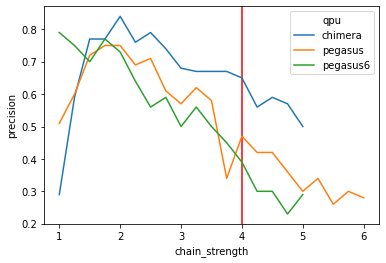

In [9]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v10_c10.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v10_c10.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v10_c10.csv")
df3['qpu'] = 'pegasus6'


df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision", hue="qpu")

In [10]:
bqm, clauses = get_bqm_random_sat(10, 15, seed)
embedding = get_embedding(bqm, qpu, random_seeds[10][15])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v10_c15")

lowest energy achieved: 0.0
ground energy samples 45/100
lowest energy achieved: 0.0
ground energy samples 65/100
lowest energy achieved: 0.0
ground energy samples 58/100
lowest energy achieved: 0.0
ground energy samples 57/100
lowest energy achieved: 0.0
ground energy samples 54/100
lowest energy achieved: 0.0
ground energy samples 40/100
lowest energy achieved: 0.0
ground energy samples 42/100
lowest energy achieved: 0.0
ground energy samples 45/100
lowest energy achieved: 0.0
ground energy samples 41/100
lowest energy achieved: 0.0
ground energy samples 26/100
lowest energy achieved: 0.0
ground energy samples 28/100
lowest energy achieved: 0.0
ground energy samples 20/100
lowest energy achieved: 0.0
ground energy samples 15/100
lowest energy achieved: 0.0
ground energy samples 13/100
lowest energy achieved: 0.0
ground energy samples 17/100
lowest energy achieved: 0.0
ground energy samples 15/100
lowest energy achieved: 0.0
ground energy samples 7/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

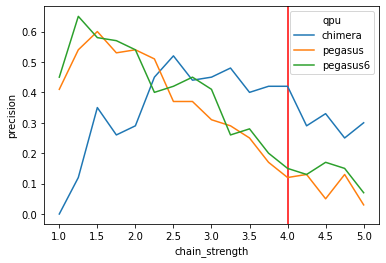

In [12]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v10_c15.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v10_c15.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v10_c15.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [13]:
bqm, clauses = get_bqm_random_sat(10, 20, seed)
embedding = get_embedding(bqm, qpu, random_seeds[10][20])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v10_c20")

lowest energy achieved: 0.0
ground energy samples 35/100
lowest energy achieved: 0.0
ground energy samples 40/100
lowest energy achieved: 0.0
ground energy samples 32/100
lowest energy achieved: 0.0
ground energy samples 39/100
lowest energy achieved: 0.0
ground energy samples 31/100
lowest energy achieved: 0.0
ground energy samples 31/100
lowest energy achieved: 0.0
ground energy samples 23/100
lowest energy achieved: 0.0
ground energy samples 20/100
lowest energy achieved: 0.0
ground energy samples 9/100
lowest energy achieved: 0.0
ground energy samples 12/100
lowest energy achieved: 0.0
ground energy samples 12/100
lowest energy achieved: 0.0
ground energy samples 7/100
lowest energy achieved: 0.0
ground energy samples 4/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 2/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

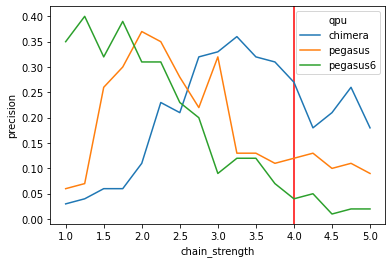

In [14]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v10_c20.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v10_c20.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v10_c20.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [15]:
bqm, clauses = get_bqm_random_sat(10, 25, seed)
embedding = get_embedding(bqm, qpu, random_seeds[10][25])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v10_c25")

lowest energy achieved: 0.0
ground energy samples 4/100
lowest energy achieved: 0.0
ground energy samples 13/100
lowest energy achieved: 0.0
ground energy samples 13/100
lowest energy achieved: 0.0
ground energy samples 8/100
lowest energy achieved: 0.0
ground energy samples 12/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 6/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 3/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 11/100
lowest energy achieved: 0.0
ground energy samples 6/100
lowest energy achieved: 0.0
ground energy samples 4/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 3/100
lowest energy achieved: 0.0
ground energy samples 2/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

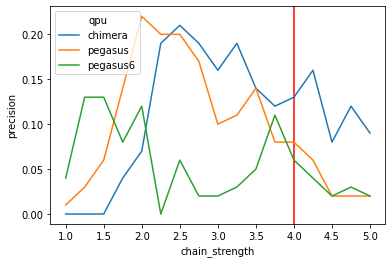

In [16]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v10_c25.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v10_c25.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v10_c25.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

## 15 variables

In [17]:
for n_clauses in [15, 20, 25, 30, 35, 40, 45]:
    bqm, clauses = get_bqm_random_sat(15, n_clauses, seed)
    embedding = get_embedding(bqm, qpu, random_seeds[15][n_clauses])
    print(scaled(bqm, embedding), max(bqm.quadratic.values()) )

12.0 4.0
12.0 4.0
12.0 4.0
16.0 4.0
18.0 6.0
20.0 6.0
20.0 6.0


In [18]:
bqm, clauses = get_bqm_random_sat(15, 15, seed)
embedding = get_embedding(bqm, qpu, random_seeds[15][15])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c15")

lowest energy achieved: 0.0
ground energy samples 43/100
lowest energy achieved: 0.0
ground energy samples 77/100
lowest energy achieved: 0.0
ground energy samples 86/100
lowest energy achieved: 0.0
ground energy samples 82/100
lowest energy achieved: 0.0
ground energy samples 75/100
lowest energy achieved: 0.0
ground energy samples 61/100
lowest energy achieved: 0.0
ground energy samples 65/100
lowest energy achieved: 0.0
ground energy samples 44/100
lowest energy achieved: 0.0
ground energy samples 44/100
lowest energy achieved: 0.0
ground energy samples 36/100
lowest energy achieved: 0.0
ground energy samples 46/100
lowest energy achieved: 0.0
ground energy samples 38/100
lowest energy achieved: 0.0
ground energy samples 26/100
lowest energy achieved: 0.0
ground energy samples 23/100
lowest energy achieved: 0.0
ground energy samples 19/100
lowest energy achieved: 0.0
ground energy samples 15/100
lowest energy achieved: 0.0
ground energy samples 15/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

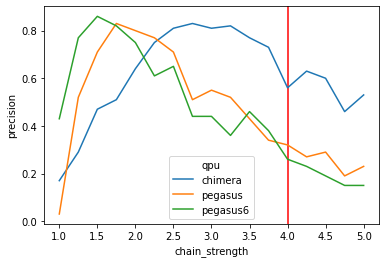

In [19]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v15_c15.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v15_c15.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v15_c15.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [20]:
bqm, clauses = get_bqm_random_sat(15, 20, seed)
embedding = get_embedding(bqm, qpu, random_seeds[15][20])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c20")

lowest energy achieved: 0.0
ground energy samples 35/100
lowest energy achieved: 0.0
ground energy samples 53/100
lowest energy achieved: 0.0
ground energy samples 69/100
lowest energy achieved: 0.0
ground energy samples 69/100
lowest energy achieved: 0.0
ground energy samples 64/100
lowest energy achieved: 0.0
ground energy samples 48/100
lowest energy achieved: 0.0
ground energy samples 41/100
lowest energy achieved: 0.0
ground energy samples 47/100
lowest energy achieved: 0.0
ground energy samples 34/100
lowest energy achieved: 0.0
ground energy samples 32/100
lowest energy achieved: 0.0
ground energy samples 21/100
lowest energy achieved: 0.0
ground energy samples 34/100
lowest energy achieved: 0.0
ground energy samples 21/100
lowest energy achieved: 0.0
ground energy samples 13/100
lowest energy achieved: 0.0
ground energy samples 13/100
lowest energy achieved: 0.0
ground energy samples 13/100
lowest energy achieved: 0.0
ground energy samples 4/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

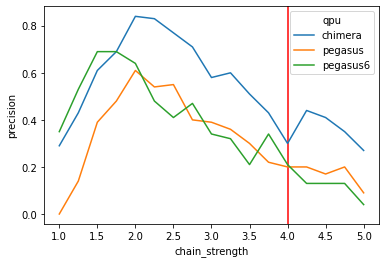

In [21]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v15_c20.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v15_c20.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v15_c20.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [22]:
bqm, clauses = get_bqm_random_sat(15, 25, seed)
embedding = get_embedding(bqm, qpu, random_seeds[15][25])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c25")

lowest energy achieved: 0.0
ground energy samples 7/100
lowest energy achieved: 0.0
ground energy samples 24/100
lowest energy achieved: 0.0
ground energy samples 48/100
lowest energy achieved: 0.0
ground energy samples 47/100
lowest energy achieved: 0.0
ground energy samples 34/100
lowest energy achieved: 0.0
ground energy samples 40/100
lowest energy achieved: 0.0
ground energy samples 36/100
lowest energy achieved: 0.0
ground energy samples 24/100
lowest energy achieved: 0.0
ground energy samples 22/100
lowest energy achieved: 0.0
ground energy samples 10/100
lowest energy achieved: 0.0
ground energy samples 11/100
lowest energy achieved: 0.0
ground energy samples 8/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 0.0
ground energy samples 6/100
lowest energy achieved: 0.0
ground energy samples 7/100
lowest energy achieved: 0.0
ground energy samples 3/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

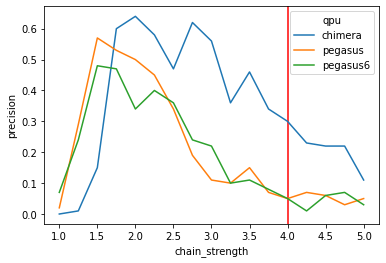

In [23]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v15_c25.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v15_c25.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v15_c25.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [24]:
bqm, clauses = get_bqm_random_sat(15, 30, seed)
embedding = get_embedding(bqm, qpu, random_seeds[15][30])
current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c30")

lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 14/100
lowest energy achieved: 0.0
ground energy samples 29/100
lowest energy achieved: 0.0
ground energy samples 37/100
lowest energy achieved: 0.0
ground energy samples 26/100
lowest energy achieved: 0.0
ground energy samples 25/100
lowest energy achieved: 0.0
ground energy samples 17/100
lowest energy achieved: 0.0
ground energy samples 12/100
lowest energy achieved: 0.0
ground energy samples 8/100
lowest energy achieved: 0.0
ground energy samples 6/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 4/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 1/100


<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

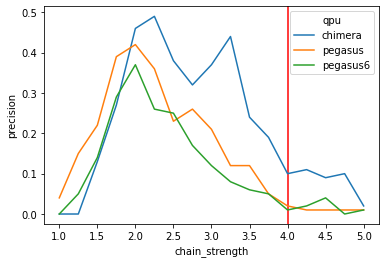

In [32]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v15_c30.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v15_c30.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v15_c30.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [26]:
bqm, clauses = get_bqm_random_sat(15, 35, seed)
embedding = get_embedding(bqm, qpu, random_seeds[15][35])
current_df = find_best_chain_strength(bqm, embedding, 7.0, clauses, "v15_c35")

lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 0.0
ground energy samples 8/100
lowest energy achieved: 0.0
ground energy samples 11/100
lowest energy achieved: 0.0
ground energy samples 19/100
lowest energy achieved: 0.0
ground energy samples 27/100
lowest energy achieved: 0.0
ground energy samples 15/100
lowest energy achieved: 0.0
ground energy samples 11/100
lowest energy achieved: 0.0
ground energy samples 11/100
lowest energy achieved: 0.0
ground energy samples 8/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 1.0
ground energy 

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

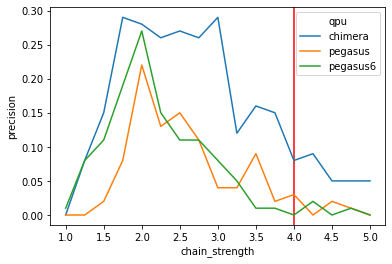

In [27]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v15_c35.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v15_c35.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v15_c35.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [28]:
bqm, clauses = get_bqm_random_sat(15, 40, seed)
embedding = get_embedding(bqm, qpu, random_seeds[15][40])
current_df = find_best_chain_strength(bqm, embedding, 7.0, clauses, "v15_c40")

lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 4/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 3/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 7/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 1.0
ground energy sample

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

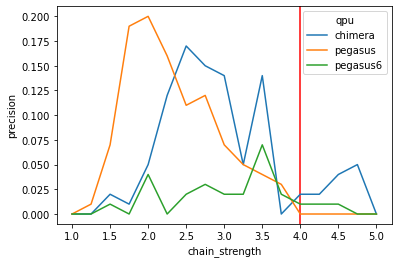

In [29]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v15_c40.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v15_c40.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v15_c40.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [30]:
bqm, clauses = get_bqm_random_sat(15, 45, seed)
embedding = get_embedding(bqm, qpu, random_seeds[15][45])
current_df = find_best_chain_strength(bqm, embedding, 7.0, clauses, "v15_c45")

lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 13/100
lowest energy achieved: 0.0
ground energy samples 10/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 6/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 4/100
lowest energy achieved: 0.0
ground energy samples 3/100
lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 3.0
ground energy samp

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

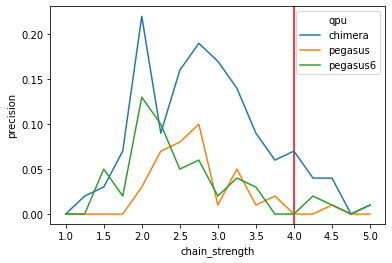

In [31]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v15_c45.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v15_c45.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v15_c45.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

# 20 variables

In [33]:
for n_clauses in [30, 35]:
    bqm, clauses = get_bqm_random_sat(20, n_clauses, seed)
    embedding = get_embedding(bqm, qpu, random_seeds[20][n_clauses])
    print(scaled(bqm, embedding), max(bqm.quadratic.values()) )

12.0 5.0
14.0 5.0


In [34]:
bqm, clauses = get_bqm_random_sat(20, 30, seed)
embedding = get_embedding(bqm, qpu, random_seeds[20][30])
current_df = find_best_chain_strength(bqm, embedding, 6.0, clauses, "v20_c30")

lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 12/100
lowest energy achieved: 0.0
ground energy samples 23/100
lowest energy achieved: 0.0
ground energy samples 37/100
lowest energy achieved: 0.0
ground energy samples 27/100
lowest energy achieved: 0.0
ground energy samples 24/100
lowest energy achieved: 0.0
ground energy samples 22/100
lowest energy achieved: 0.0
ground energy samples 14/100
lowest energy achieved: 0.0
ground energy samples 14/100
lowest energy achieved: 0.0
ground energy samples 11/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 8/100
lowest energy achieved: 0.0
ground energy samples 6/100
lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 1.0
ground ener

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

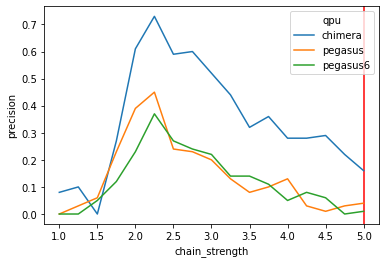

In [40]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v20_c30.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v20_c30.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v20_c30.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(5, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")

In [38]:
bqm, clauses = get_bqm_random_sat(20, 35, seed)
embedding = get_embedding(bqm, qpu, random_seeds[20][35])
current_df = find_best_chain_strength(bqm, embedding, 6.0, clauses, "v20_c35")

lowest energy achieved: 1.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 0.0
ground energy samples 8/100
lowest energy achieved: 0.0
ground energy samples 12/100
lowest energy achieved: 0.0
ground energy samples 20/100
lowest energy achieved: 0.0
ground energy samples 21/100
lowest energy achieved: 0.0
ground energy samples 21/100
lowest energy achieved: 0.0
ground energy samples 16/100
lowest energy achieved: 0.0
ground energy samples 7/100
lowest energy achieved: 0.0
ground energy samples 5/100
lowest energy achieved: 0.0
ground energy samples 6/100
lowest energy achieved: 0.0
ground energy samples 3/100
lowest energy achieved: 0.0
ground energy samples 1/100
lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 2.0
ground energy samples 0/100
lowest energy achieved: 0.0
ground energy samples 2/100
lowest energy achieved: 2.0
ground energy s

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

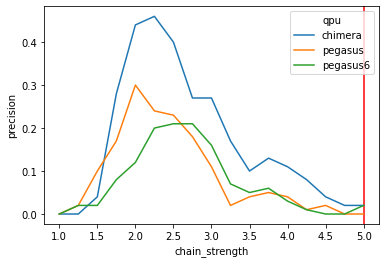

In [41]:
df = pd.read_csv("./rnd_cnf_precision/chimera_v20_c35.csv")
df['qpu'] = 'chimera'
df2 = pd.read_csv("./rnd_cnf_precision/v20_c35.csv")
df2['qpu'] = 'pegasus'
df3 = pd.read_csv("./rnd_cnf_precision/advantage6_v20_c35.csv")
df3['qpu'] = 'pegasus6'

df = df.append(df2)
df = df.append(df3)
plt.axvline(5, 0,1.0,color='r')
sns.lineplot(data=df[df.chain_strength<=5], x="chain_strength", y="precision", hue="qpu")